<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выпфолнения проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [135]:
import pandas as pd
df =pd.read_csv('/datasets/real_estate_data.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB
None
  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                         

### Вывод

Данные представлены через разделитель, в дальнейшем придётся его сменить, чтобы подготовить таблицу к работе и анализу. В данных содержится информация о квартирах, взятых с Яндекс.Недвижимость. Там есть инфо о ценах, общей площади, выставлении на продажу, сколько стоит на продажу и т.д. В общем, дан массив из 23699 строк. 

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Это не выводы по данным

### Шаг 2. Предобработка данных

In [136]:
df =pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропущенные значения в столбцах:
building_series_id, ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name,
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и изучены, класс

In [137]:
pd.set_option('display.max_columns', None)
print(df.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт

2.65


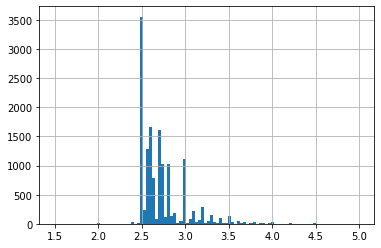

In [138]:
df['ceiling_height'].hist(bins=100, range=(1.5, 5))
height_median = df['ceiling_height'].median()
print(height_median)
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)

Столбцы без пропусков: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, area, open_plan
Пиковые значения на 2.5м, высокая концентрация квартир также с потолками от 2.5м до 3.0м, пропущенные значения заменим на медиану: 2.65

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


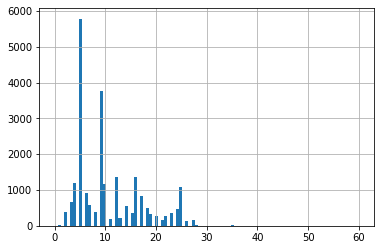

In [139]:
df['floors_total'].hist(bins=100, range=(0, 60))
print(df['floors_total'].unique())

Пики на 5, 9, 17 и 25 этажных зданиях

In [140]:
df.dropna(subset = ['floors_total'], inplace = True)

Пропусков менее 1%, удаляем их.

In [141]:
df.dropna(subset = ['locality_name'], inplace = True)

Тоже самое характерно для locality_name.
Пропусков в столбце living_area 8%.

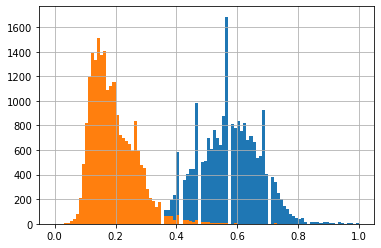

In [142]:
df['part_living_area'] = round(df['living_area'] / df['total_area'], 2)
df['part_kitchen_area'] = round(df['kitchen_area'] / df['total_area'], 2)
df['part_living_area'].hist(bins=100, range=(0, 1))
df['part_kitchen_area'].hist(bins=100, range=(0, 1))

Средний процент жилой площади от общей 55%, кухонной 15%. Использую эту инфу для удаления пропусков

In [143]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.55)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.15)
df_err = df.query('total_area < (living_area+kitchen_area)')
df = df.query('total_area > (living_area+kitchen_area)')

Выполняем проверку на то, правильно ли указаны площади. Всего было обнаружено 100 аномальных квартир и их проще удалить.

In [144]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Инфо, указанная в анализе, не актуальна. Заполним все пропуски значением False, так как эти квартиры не являются апартаментами.
Тоже касается и балконов, прудов и парков в районе 3 км ведь информацию не указывали, так как их нет.

In [145]:
df.dropna(subset = ['days_exposition'], inplace = True)

Посмотрим на длительность продажи квартиры, поэтому все открытые объявления я уберу, так как этих данных 13%.

In [146]:
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['locality_name'] = df['locality_name'].str.lower()
df['days_exposition'] = df['days_exposition'].astype('int')

Оптимизирую данные: меняю тип на int там, где нет дробных частей, и привожу текстовые данные к нижнему регистру

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

In [147]:
#Добавим цену квадратного метра

df['metr_price'] = round(df['last_price'] / df['total_area'], 2)

#Добавим день недели, месяц и год

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['first_day_exposition'] = df['first_day_exposition'].dt.date

#Время размещения объявления нам не важно

In [148]:
#этаж, на котором расположена квартира; варианты — первый, последний, другой;
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
df['floors_category'] = df.apply(floor, axis=1)

In [149]:
df.groupby('floors_category').agg({'metr_price': 'median'})

,metr_price
floors_category,
другой,97058.82
первый,80307.26
последний,87301.59


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Типичные параметры продаваемых квартир: площадь, цена, цена за квадратный метр, этаж.
Построим матрицу и график зависимости цены от площади.

            total_area  last_price     floor  metr_price
total_area    1.000000    0.643067 -0.024009    0.305776
last_price    0.643067    1.000000  0.026539    0.737363
floor        -0.024009    0.026539  1.000000    0.131290
metr_price    0.305776    0.737363  0.131290    1.000000


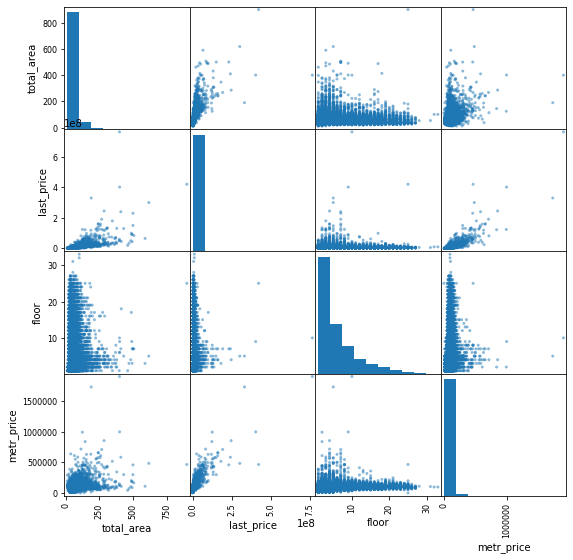

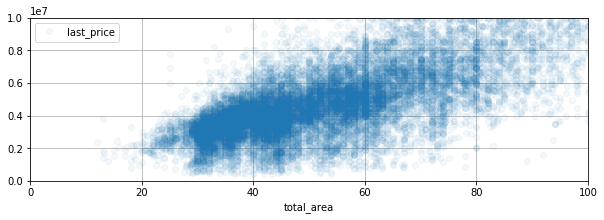

In [150]:
flat_stat_multi = df.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]
print(flat_stat_multi.corr())

pd.plotting.scatter_matrix(flat_stat_multi, figsize=(9, 9))

df.sort_values('total_area').plot(x='total_area', y='last_price', style='o', grid=True, figsize=(10, 3), alpha=0.05, ylim=(0,10000000), xlim=(0,100))

Графики показывают, что рост цены не сильно зависит от роста этажа.
Стоит отметить, что цена за метр растет с ростом площади также как и цена за метр растёт с ростом цены почти пропорционально.

Построим гистограмму количества дней, за которое продавали квартиры.

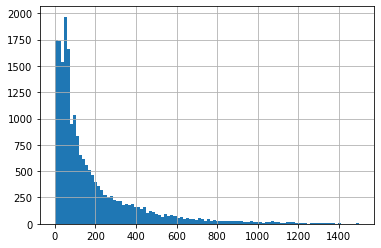

In [151]:
df['days_exposition'].hist(bins=100, range=(0, 1500))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c9558cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c956ab7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c9558c9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c955b64d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c956ab690>],
 'means': []}

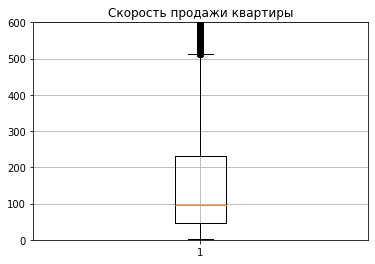

In [152]:
import matplotlib.pyplot as plt

plt.grid(True)
plt.ylim(0, 600)
plt.title('Скорость продажи квартиры')
plt.grid(True)
plt.boxplot(df['days_exposition'])

В среднем люди продают квартиру примерно за 3 месяца.

Взглянем на площадь, цену, кол-во комнат, высоту потолков, число балконов и уберем аномальные данные.

[ 1  2  3  4  5  0  6  7  8 14 15  9 11 19 10 16 12]


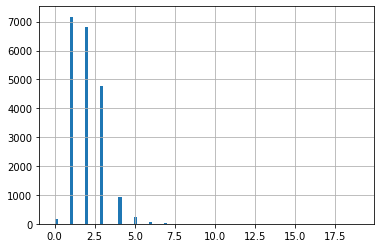

In [153]:
df['rooms'].hist(bins=100)
print(df['rooms'].unique())
df_good = df.query('rooms < 8')

Больше 8-комнатных квартир очень мало, поэтому мы их удалим.

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображено

Спасибо за комментарий! А подскажи как к .hist() подкрутить подписи, легенду и тд.? Я чего-то гуглил и не нашёл.

Отрежем квартиры меньше 20 кв метров и больше 200 кв метров, тк их очень мало

12.0
900.0


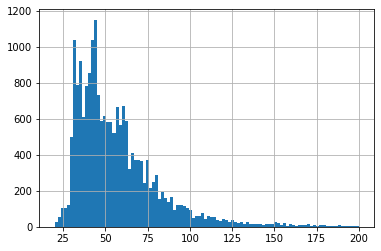

In [154]:
df['total_area'].hist(bins=100, range=(20, 200))
print(df['total_area'].min())
print(df['total_area'].max())
df_good = df_good.query('20 < total_area < 200')

Также убираем квартиры с потолками менее 2 метров и более 4 метров, так как их очень мало.

1.0
27.0


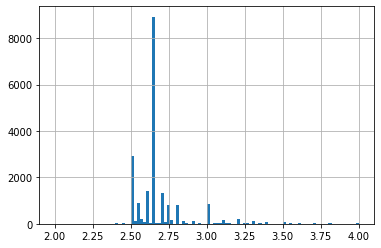

In [155]:
df['ceiling_height'].hist(bins=100, range=(2, 4))
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
df_good = df_good.query('2 < ceiling_height < 4')

Ввиду малой доли, убираем квартиры с ценой меньше 500 тысяч рублей и больше 20 миллионов рублей.

12190
763000000


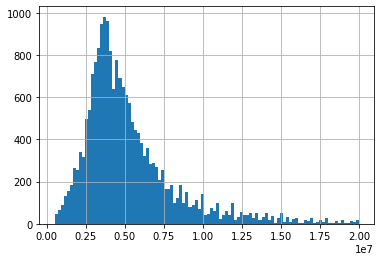

In [156]:
df['last_price'].hist(bins=100, range=(500000, 20000000))
print(df['last_price'].min())
print(df['last_price'].max())
df_good = df_good.query('500000 < last_price < 20000000')

Балконы - ОК.

0
5


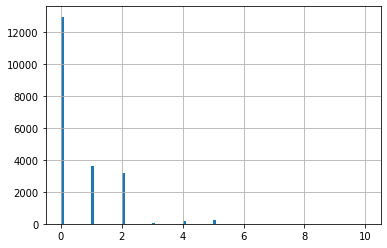

In [157]:
df['balcony'].hist(bins=100, range=(0, 10))
print(df['balcony'].min())
print(df['balcony'].max())

In [158]:
#print(df_good.info())
print('У нас осталось', round(len(df_good)/len(df), 2)*100, '% хороших данных ')

У нас осталось 97.0 % хороших данных 


Еще раз посмотрим зависимости

            total_area  last_price     floor  metr_price
total_area    1.000000    0.771691 -0.029852    0.045603
last_price    0.771691    1.000000  0.094814    0.630502
floor        -0.029852    0.094814  1.000000    0.217281
metr_price    0.045603    0.630502  0.217281    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c957bc190>,
      dtype=object)

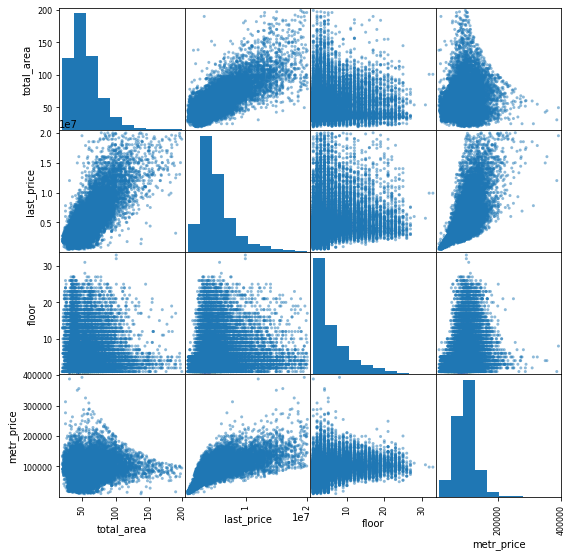

In [159]:
flat_stat_multi = df_good.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]
print(flat_stat_multi.corr())
pd.plotting.scatter_matrix(flat_stat_multi, figsize=(9, 9))

Из графиков видно, что площадь не связана с ценой за метр и этажом. С ростом этажа, цена за метр растёт.
Чем больше площадь, тем ниже цена за метр. Цена растёт с ростом цены за метр.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Верно

Изучаем зависимость цены за квадратный метр от разных параметров

                     metr_price     rooms  airports_nearest  \
metr_price             1.000000 -0.142744         -0.041672   
rooms                 -0.142744  1.000000         -0.055998   
airports_nearest      -0.041672 -0.055998          1.000000   
cityCenters_nearest   -0.394048 -0.139681          0.270648   
parks_nearest          0.104321 -0.048017         -0.087225   
ponds_nearest         -0.076162 -0.022273          0.011582   

                     cityCenters_nearest  parks_nearest  ponds_nearest  
metr_price                     -0.394048       0.104321      -0.076162  
rooms                          -0.139681      -0.048017      -0.022273  
airports_nearest                0.270648      -0.087225       0.011582  
cityCenters_nearest             1.000000      -0.060412       0.003869  
parks_nearest                  -0.060412       1.000000       0.005022  
ponds_nearest                   0.003869       0.005022       1.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c959c5d90>,
      dtype=object)

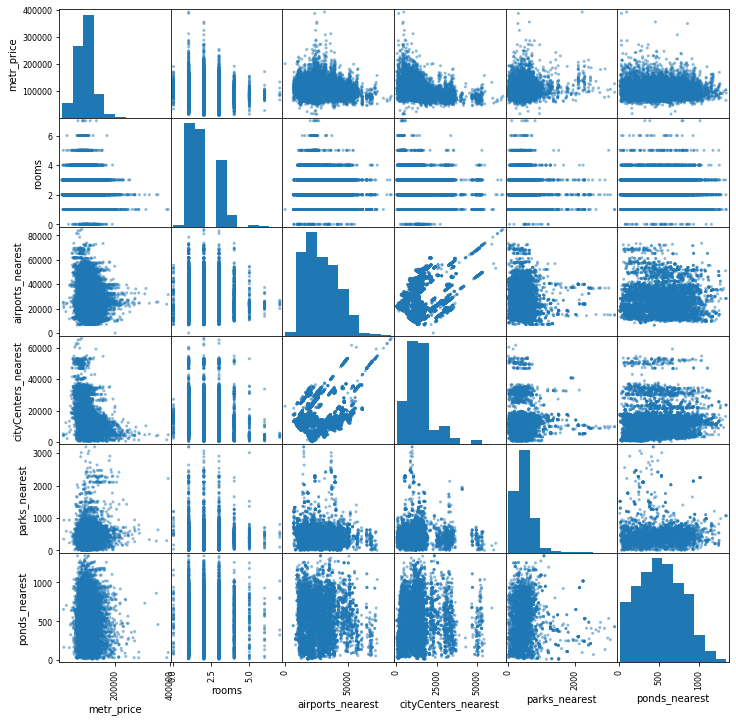

In [160]:
flat_stat_metr_price = df_good.loc[:, ['metr_price', 'rooms', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']]
                                                                               
print(flat_stat_metr_price.corr())
pd.plotting.scatter_matrix(flat_stat_metr_price, figsize=(12, 12))

Цена за кв метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров цена почти не зависит.

Посмотрим зависимость цены за кв метр от этажа (первого или последнего) и даты размещения: дня недели, месяца и года.

                 metr_price
floors_category            
другой             96451.61
первый             79957.36
последний          86250.00


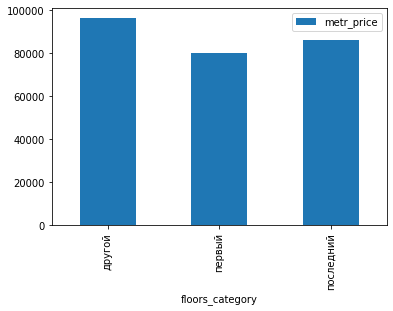

In [161]:
#print(df_good.head())
data_pivot_floors_category = df_good.pivot_table(index='floors_category', values='metr_price', aggfunc='median')
data_pivot_floors_category.plot(y='metr_price', kind ='bar')
print(data_pivot_floors_category)

          metr_price
week_day            
0          93159.610
1          93516.130
2          93676.815
3          93572.415
4          92968.750
5          92356.690
6          92753.620


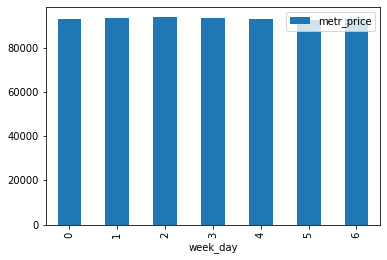

In [162]:
data_pivot_week_day = df_good.pivot_table(index='week_day', values ='metr_price', aggfunc='median')
data_pivot_week_day.plot(y='metr_price', kind ='bar')
print(data_pivot_week_day)

       metr_price
month            
1       93669.870
2       93283.580
3       93023.260
4       92105.260
5       91673.090
6       91341.830
7       93250.025
8       95000.000
9       94852.580
10      93537.410
11      93758.620
12      91666.670


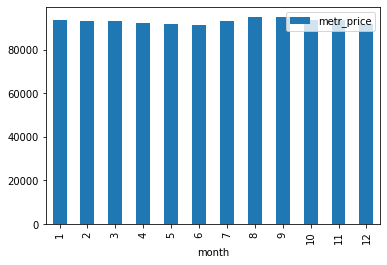

In [163]:
data_pivot_month = df_good.pivot_table(index='month', values ='metr_price', aggfunc='median')
data_pivot_month.plot(y='metr_price', kind ='bar')
print(data_pivot_month)

      metr_price
year            
2014   102373.20
2015    91185.72
2016    90748.25
2017    91463.41
2018    95000.00
2019   103058.13


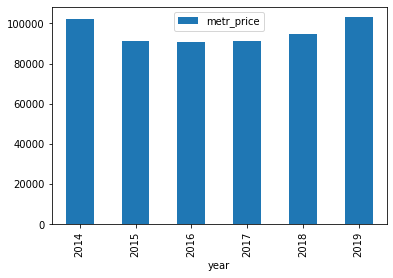

In [164]:
data_pivot_year = df_good.pivot_table(index='year', values ='metr_price', aggfunc='median')
data_pivot_year.plot(y='metr_price', kind ='bar')
print(data_pivot_year)

In [165]:
print("""Исходя из графиков видно, что лучше покупать квартиру с пятницы по субботу в мае и июне, 
а в период с августа по сентябрь и с понедельника по пятницу квартиру покупать не выгодно.
Самые дешёвые квартиры на первом этаже, а самые дорогие - на "другом".
В 2019 цены вернулись на уровень 2014 года. 
Также можно проследить, что цена с 2015 по 2017 были на одном уровне и начали рост с 2018.""")

Исходя из графиков видно, что лучше покупать квартиру с пятницы по субботу в мае и июне, 
а в период с августа по сентябрь и с понедельника по пятницу квартиру покупать не выгодно.
Самые дешёвые квартиры на первом этаже, а самые дорогие - на "другом".
В 2019 цены вернулись на уровень 2014 года. 
Также можно проследить, что цена с 2015 по 2017 были на одном уровне и начали рост с 2018.


<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно, но лучше все пояснения писать не комментариями или в print, а в специальных markdown ячейках

In [166]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно, но лучше делить код на маленькие законченные куски, а все пояснения писать не комментариями, а в специальных markdown ячейках#Выберите 10 населённых пунктов с наибольшим числом объявлений.

data_pivot_locality_name = df_good.pivot_table(index='locality_name', values ='metr_price', aggfunc='count')

#возьмем 11 первых значений, так как там будет Санкт-Петербург

data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(data_pivot_locality_name.head(11))

                   metr_price
locality_name                
санкт-петербург         12892
посёлок мурино            505
посёлок шушары            405
всеволожск                328
колпино                   306
посёлок парголово         300
пушкин                    296
деревня кудрово           294
гатчина                   263
выборг                    201
петергоф                  171


In [167]:
#создадим словарь с этими населенными пунктами
list_country = ['посёлок мурино',
        'посёлок шушары', 
        'всеволожск', 
        'колпино', 
        'пушкин', 
        'посёлок парголово', 
        'деревня кудрово',
        'гатчина',
        'выборг',
        'петергоф']
df_prigorod = df_good.query('locality_name in @list_country')

#перепишем data_pivot_locality_name

data_pivot_locality_name = df_prigorod.pivot_table(index='locality_name', 
                                                   values =['metr_price', 'cityCenters_nearest'], 
                                                   aggfunc='median')
data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(data_pivot_locality_name)

                   cityCenters_nearest  metr_price
locality_name                                     
пушкин                         27909.0   97607.845
деревня кудрово                    NaN   91930.235
посёлок парголово              19301.5   91387.360
посёлок мурино                     NaN   85714.290
петергоф                       33058.0   80952.380
посёлок шушары                 24168.5   75949.370
колпино                        31982.0   74005.090
гатчина                            NaN   67073.170
всеволожск                         NaN   65613.405
выборг                             NaN   57377.050


Пушкин находится примерно в 10км от КАДа, но лидирует по ценам за квадратный метр.
Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним.
Остальные города находятся дальше от КАДа с чем связана их низкая цена за квадратный метр.

Проверим еще раз Пушкин.

Гистограмма обычная, поэтому оставим предыдущие выводы


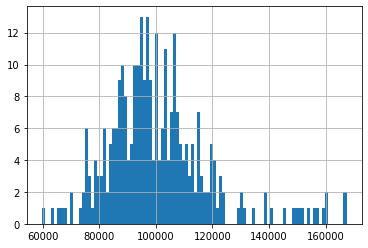

In [168]:
df_pushkin = df_good.query('"пушкин" in locality_name')
df_pushkin['metr_price'].hist(bins=100)
print('Гистограмма обычная, поэтому оставим предыдущие выводы')

Гистограмма обычная, поэтому оставим предыдущие выводы.

Сегменты до 7000 м, от 7000 м до 20000 м, от 20000 м до 38000 м, дальше 38000 м


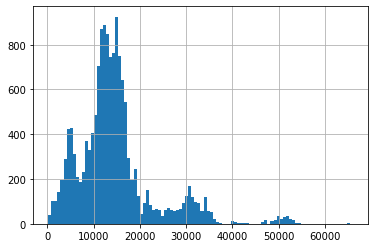

In [169]:
#Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра.
#Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений.
#Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

df_cityCenters = df_good
df_cityCenters.dropna(subset = ['cityCenters_nearest'], inplace = True)
df_cityCenters['cityCenters_nearest'].hist(bins=100)
print('Сегменты до 7000 м, от 7000 м до 20000 м, от 20000 м до 38000 м, дальше 38000 м')

df_cityCenters_7 = df_cityCenters.query('cityCenters_nearest < 7000')
df_cityCenters_20 = df_cityCenters.query('7000 <= cityCenters_nearest < 20000')
df_cityCenters_38 = df_cityCenters.query('20000 <= cityCenters_nearest < 38000')
df_cityCenters_more = df_cityCenters.query('38000 <= cityCenters_nearest')

            total_area  last_price     floor  metr_price
total_area    1.000000    0.705321  0.005584   -0.323678
last_price    0.705321    1.000000  0.141802    0.390163
floor         0.005584    0.141802  1.000000    0.195392
metr_price   -0.323678    0.390163  0.195392    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c944fd450>,
      dtype=object)

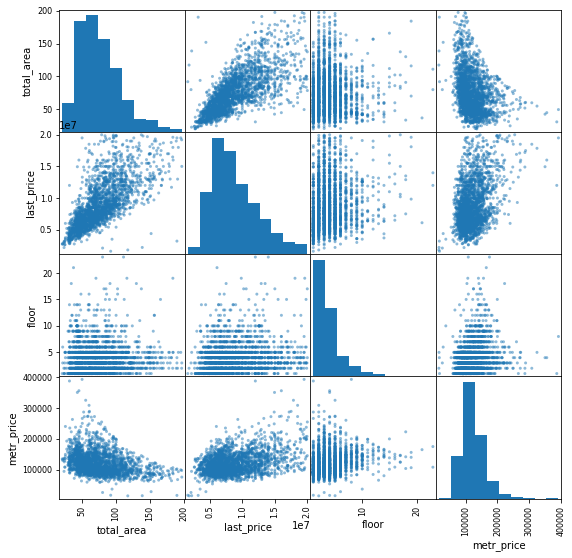

In [170]:
flat_stat_7 = df_cityCenters_7.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_7.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

В пределах 7000 м
Из графиков видно, что с ростом этажа: общая цена и цена за метр немного растет;
                       с ростом площади: цена растет, цена за метр падает;
                       с ростом цены: цена за метр растет;
                       площадь не зависит от этажа.

            total_area  last_price     floor  metr_price
total_area    1.000000    0.838126  0.041745   -0.026596
last_price    0.838126    1.000000  0.126183    0.488627
floor         0.041745    0.126183  1.000000    0.204922
metr_price   -0.026596    0.488627  0.204922    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c94568990>,
      dtype=object)

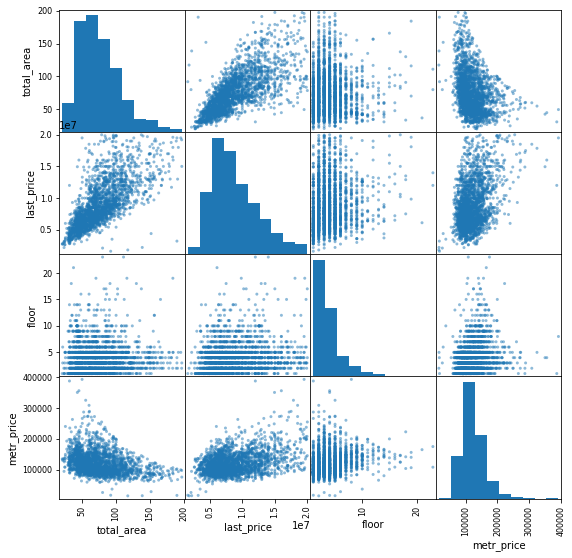

In [171]:
flat_stat_20 = df_cityCenters_20.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_20.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

В пределах 20000 м
Из графиков видно, что с ростом этажа: общая цена и цена за метр немного растет;
                       с ростом площади: цена растет, цена за метр падает;
                       с ростом цены: цена за метр растет;
                       площадь не зависит от этажа.

            total_area  last_price     floor  metr_price
total_area    1.000000    0.800387  0.011888   -0.123647
last_price    0.800387    1.000000  0.047136    0.457457
floor         0.011888    0.047136  1.000000    0.091617
metr_price   -0.123647    0.457457  0.091617    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c947e6a10>,
      dtype=object)

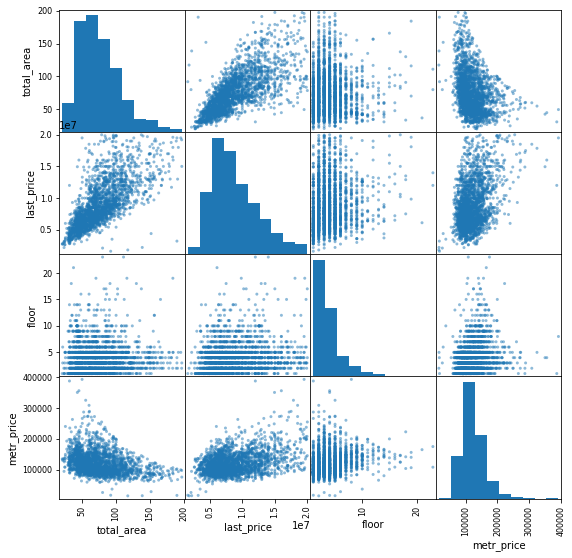

In [172]:
flat_stat_38 = df_cityCenters_38.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_38.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

В пределах 38000 м
Из графиков видно, что с ростом этажа: общая цена и цена за метр слабо меняются в большую сторону;
                       с ростом площади: цена растет, цена за метр немного падает;
                       с ростом цены: цена за метр растет;
                       площадь не зависит от этажа.

            total_area  last_price     floor  metr_price
total_area    1.000000    0.838907  0.060770   -0.188023
last_price    0.838907    1.000000  0.088289    0.323248
floor         0.060770    0.088289  1.000000    0.046883
metr_price   -0.188023    0.323248  0.046883    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c947271d0>,
      dtype=object)

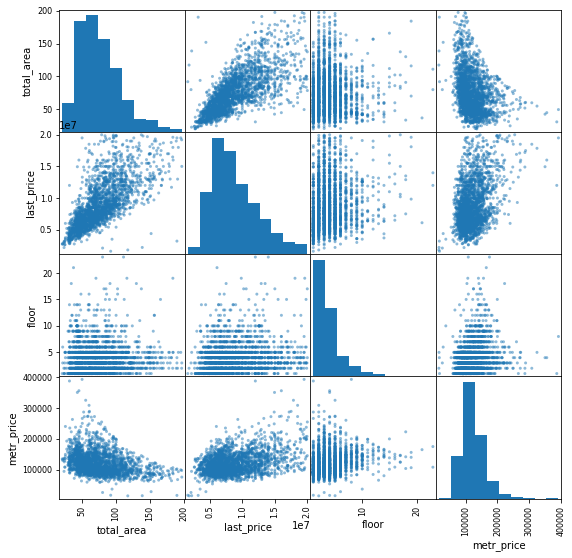

In [173]:
flat_stat_more = df_cityCenters_more.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_more.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

Дальше 38000 м
Из графиков видно, что с ростом этажа: общая цена и цена за метр почти не меняются;
                       с ростом площади: цена растет, цена за метр немного падает;
                       с ростом цены: цена за метр растет;
                       площадь не зависит от этажа.

In [174]:
#print(df_good.head())

Решил разбить квартиры на апартаменты, студии и квартиры со свободной планировкой.
Наиболее характерные параметры для апартаментов, студий и квартир свободной планировки:'Площадь, цена, цена за квадратный метр, этаж

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

Проверим пересекаются ли  у апартаментов, студий и квартир свободной планировки и типовой планировки значения

In [175]:
df_apartment = df_good.query('is_apartment == True')
print(df_apartment.query('studio == True'))
print(df_apartment.query('open_plan == True'))

df_studio = df_good.query('studio == True')
print(df_studio.query('is_apartment == True'))
print(df_studio.query('open_plan == True'))

df_open_plan = df_good.query('open_plan == True')
print(df_open_plan.query('is_apartment == True'))
print(df_open_plan.query('studio == True'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_

Не пересекаются

In [176]:
#Добавим столбец с типами квартир
def type(data):
    if data['is_apartment'] == True:
        return 'апартаменты'
    elif data['studio'] == True:
        return 'студия'
    elif data['open_plan'] == True:
        return 'св планировка'
    else:
        return 'тип планировка'
        
df_good['type_of_flat'] = df_good.apply(type, axis=1)

df_type_pivot = df_good.pivot_table(index='type_of_flat', 
                                    values=['metr_price', 'total_area', 'last_price', 'ceiling_height'], 
                                    aggfunc='median')
print(df_type_pivot)

                ceiling_height  last_price  metr_price  total_area
type_of_flat                                                      
апартаменты               2.80     5500000  112782.000      53.100
св планировка             2.65     3377500  115065.705      28.025
студия                    2.65     3350000  124074.070      27.000
тип планировка            2.65     5000000   99596.750      51.600


Высота потолков в апартаментах выше в среднем на 15 см
Апартаменты и квартиры с типичной планировкой в среднем на 20 млн дороже чем студи и квартиры свободной планировки
Цена за метр ниже всего в типовых квартирах, в студиях дороже всего
Квартиры студии и св планировки в основном небольшие, в отличае от апартаментов и типовых квартир

Вывод: Чем дальше дом от центра, тем меньше растет цена и, соответсвенно, цена за метр с ростом этажа.

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Очень мало выводов, проведи полноценное изучение полученных данных, напиши везде выводы, построй качественные визуализации с подписями, выводы все оформи с помощью markdown ячеек, а не в функции print. Удачи!


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Очень детальная и объёмная работа, супер!)

### Шаг 5. Общий вывод

Зависимость типичных параметров квартир:
                           с ростом этажа: цена за метр аналогично растет;
                           с ростом площади: цена растет, цена за метр незначительно падает;
                           с ростом цены: цена за метр растет;
                           площадь не связана с: ценой за метр и этажем.

В среднем люди продают квартиру примерно за3 месяца.

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров(удаленность от аэропортов, парков, прудов) цена за квадрадный почти не зависит

Анализ населенных пунктов с наибольщим числом объявлений:
-Пушкин находится примерно в 10км от КАДа, но лидирует по ценам за квадратный метр.
-Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним.
-Остальные города находятся дальше от КАДа с чем связана их низкая стоимость цены за квадратный метр.

Чем дальше дом от центра Санкт-Петербурга, тем меньше растет цена и, соответсвенно, цена за квадратный метр с ростом этажа.

Сравнение апартаментов, студий, квартир со свободной и типовой планировками:
-Высота потолков в апартаментах выше в среднем на 15 см
-Апартаменты и квартиры с типичной планировкой в среднем на 20 млн дороже чем студи и квартиры свободной планировки
-Цена за метр ниже всего в типовых квартирах, в студиях дороже всего
-Квартиры студии и св планировки в основном небольшие, в отличае от апартаментов и типовых квартир

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Замечательный вывод покрывающий все аспекты проделанной работы! 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)